In [1]:
#import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import operator
from  dateutil.relativedelta import relativedelta
from importlib import reload
plt=reload(plt)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading the Dataset in Python


In [3]:
#Read the excel file and store the sheets into dataframes.
dataset = pd.ExcelFile('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/V02Max_Combined.xlsx')
#dataset='Hackathon_Aug24/V02Max_Combined.xlsx'

Athletes = pd.read_excel(dataset, sheet_name = 'Athletes')  # Read the 'Athletes' information into a DataFrame
Kayaking = pd.read_excel(dataset, sheet_name = 'Kayaking')  #Read Kayaking related Athlete information
Triathlon = pd.read_excel(dataset, sheet_name = 'Triathlon') #Read Triathlon related Athlete information
Fencing = pd.read_excel(dataset, sheet_name = 'Fencing') #Read Fencing related Athlete information

#Merge all sports related test measures into one dataframe.Here in this dataset, three types of sports are there-Kayaking,Triathlon and Fencing.
Below are the information of the variables in the dataset:



1.   ID(Participant identifier)
2.   time	(Time since the Graded effort test starts, in seconds)
3.   RR	(Heart Rate R-wave to R-Wave interval, in milliseconds)
4.   VO2	(Oxygen consumption, in mL/min)
5.   power(	Mechanical power of the cycloergormeter, in watts)












In [4]:
# Concatenate sports DataFrames
All_sports=pd.concat([Kayaking, Triathlon, Fencing])

print(All_sports)

       ID     time     RR       VO2  power
0      11 -168.600  727.0  0.287147      0
1      11 -167.872  728.0  0.287147      0
2      11 -167.148  724.0  0.287147      0
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[52062 rows x 5 columns]


#Lets check the data for more information like types of the Variable etc

In [5]:
#datatypes of All_sports dataframe
All_sports.dtypes

,0
ID,int64
time,float64
RR,float64
VO2,float64
power,int64


In [6]:
#datatypes of Athletes dataframe
Athletes.dtypes

,0
ID,int64
age,int64
Weight,float64
Height,int64
P_vt1,int64
P_vt2,int64
sport,object
Gender,object
Ethnicity,object
First Name,object


In [7]:
#checking for any missing value in All_sports df
All_sports.isnull().sum()

,0
ID,0
time,0
RR,1148
VO2,0
power,0


In [8]:
#As we can see above RR Variable has 1148 rows of missing value,we have to handle the missing value
All_sports_new=All_sports.interpolate()
All_sports_new.isnull().sum()

,0
ID,0
time,0
RR,0
VO2,0
power,0


In [9]:
#checking for any missing value in Athletes df
Athletes.isnull().sum()

,0
ID,0
age,0
Weight,0
Height,0
P_vt1,0
P_vt2,0
sport,0
Gender,0
Ethnicity,0
First Name,0


In [10]:
#changed the type of ID to category as we are not doing any airthmatic operation with that field
Athletes['ID']= Athletes['ID'].astype('category')
All_sports_new['ID']= All_sports['ID'].astype('category')

In [11]:
#listing numerical data
numerical_cols1 = Athletes.select_dtypes(include=['int', 'float']).columns
numerical_cols2 = All_sports_new.select_dtypes(include=['int', 'float']).columns

#finding maximum of all columns
print(Athletes[numerical_cols1].max() )
print(All_sports_new[numerical_cols2].max() )



age        18.0
Weight     89.9
Height    191.0
P_vt1     215.0
P_vt2     300.0
dtype: float64
time      1504.056000
RR       30500.000000
VO2          4.576774
power      335.000000
dtype: float64


In [64]:
#finding minimum of all columns
print(Athletes[numerical_cols1].min() )
print(All_sports_new[numerical_cols2].min())

age        12.0
Weight     39.7
Height    156.0
P_vt1      50.0
P_vt2     108.0
dtype: float64
time    -219.872000
RR       252.000000
VO2        0.069354
power      0.000000
dtype: float64


In [12]:
#get the statistical
Athletes.describe(include=[int, float])

,age,Weight,Height,P_vt1,P_vt2
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,15.222222,64.761111,173.277778,113.055556,187.277778
std,1.957055,15.545120,10.447660,46.949876,63.292789
min,12.000000,39.700000,156.000000,50.000000,108.000000
25%,14.000000,54.325000,165.000000,79.250000,141.250000
50%,15.000000,62.900000,174.000000,105.500000,169.000000
75%,16.750000,76.475000,182.000000,143.000000,246.750000
max,18.000000,89.900000,191.000000,215.000000,300.000000


In [13]:
All_sports_new.describe(include=[int, float])

,time,RR,VO2,power
count,52062.00000,52062.000000,52062.000000,52062.000000
mean,547.45914,441.577696,1.539104,106.528754
std,386.29623,210.667655,0.799706,88.603627
min,-219.87200,252.000000,0.069354,0.000000
25%,244.29500,352.000000,0.972290,0.000000
50%,542.03800,408.000000,1.419143,95.000000
75%,822.13900,484.000000,2.043474,170.000000
max,1504.05600,30500.000000,4.576774,335.000000


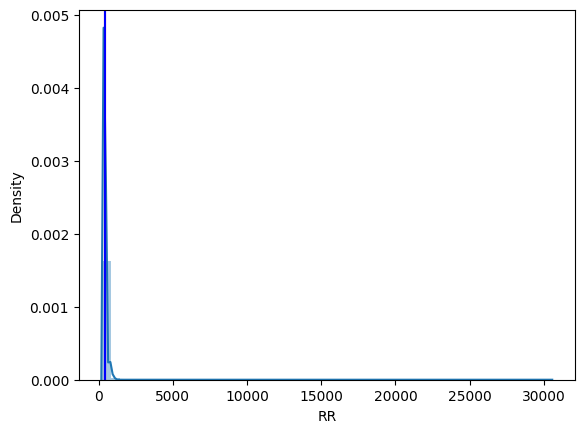

In [14]:
sns.distplot(All_sports_new.RR)
plt.axvline(All_sports_new.RR.mean(),color='r')
plt.axvline(All_sports_new.RR.median(),color='b')
plt.show()

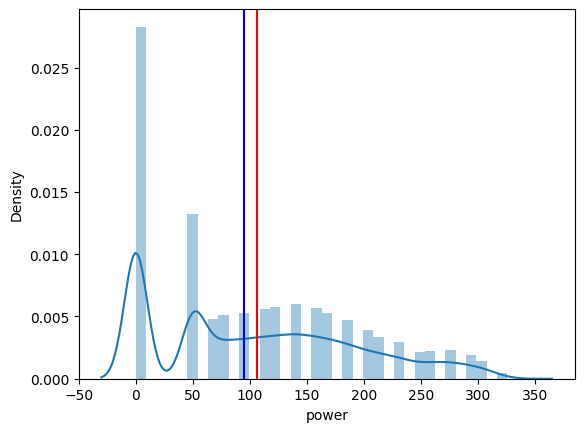

In [15]:
sns.distplot(All_sports_new.power)
plt.axvline(All_sports_new.power.mean(),color='r')
plt.axvline(All_sports_new.power.median(),color='b')
plt.show()

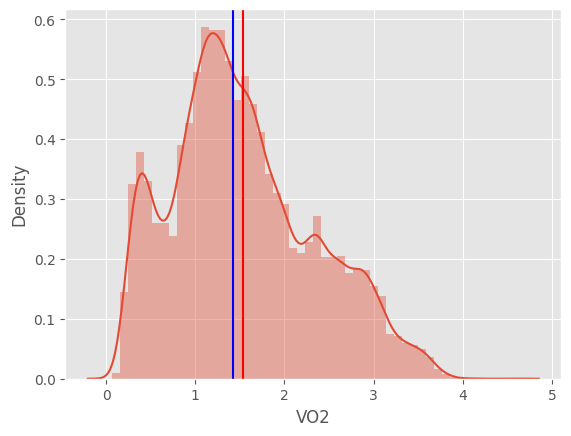

In [69]:
sns.distplot(All_sports_new['VO2'])
plt.axvline(All_sports_new['VO2'].mean(),color='r')
plt.axvline(All_sports_new['VO2'].median(),color='b')
plt.show()

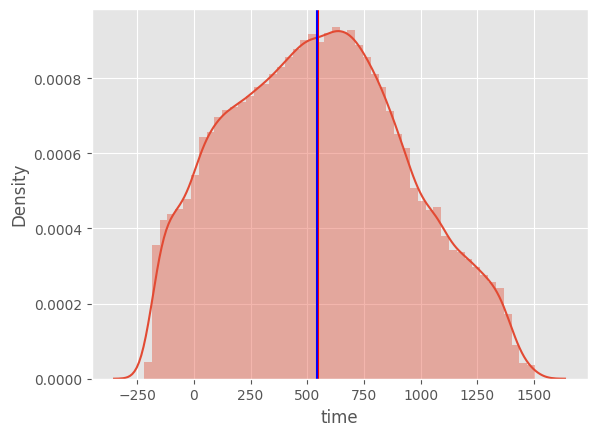

In [70]:
sns.distplot(All_sports_new.time)
plt.axvline(All_sports_new.time.mean(),color='r')
plt.axvline(All_sports_new.time.median(),color='b')
plt.show()

<Axes: ylabel='time'>

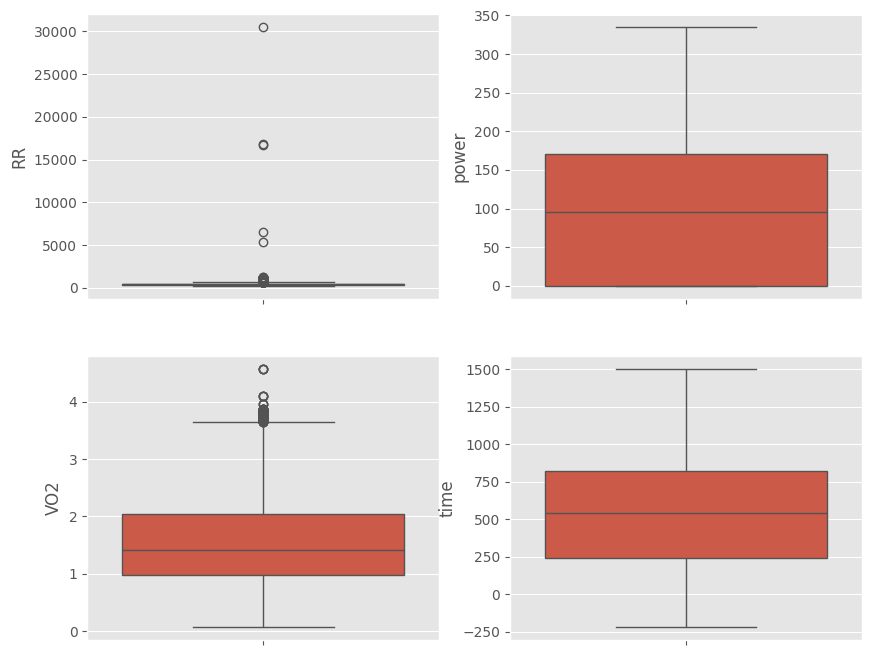

In [16]:
plt.figure(figsize=(10,17))
plt.style.use('ggplot')
plt.subplot(4,2,1)
sns.boxplot(All_sports_new.RR)
plt.subplot(4,2,2)
sns.boxplot(All_sports_new.power)
plt.subplot(4,2,3)
sns.boxplot(All_sports_new['VO2'])
plt.subplot(4,2,4)
sns.boxplot(All_sports_new.time)

In [17]:
#Detecting outliers in VO2 variable using Tukey Fence Method
Q1=All_sports_new['VO2'].quantile(0.25)
Q3= All_sports_new['VO2'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
print(Lower_limit)
print(Upper_limit)

outliers=All_sports_new[(All_sports_new['VO2']<Lower_limit) | (All_sports_new['VO2']>Upper_limit)]
non_outliers=All_sports_new[(All_sports_new['VO2']>=Lower_limit) & (All_sports_new['VO2']<=Upper_limit)]
print(non_outliers)


1.0711846352499999
-0.6344872158749998
3.6502513251249997
       ID     time     RR       VO2  power
0      11 -168.600  727.0  0.287147      0
1      11 -167.872  728.0  0.287147      0
2      11 -167.148  724.0  0.287147      0
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[51899 rows x 5 columns]


In [30]:
#detect outliers in RR field
Q1=non_outliers['RR'].quantile(0.25)
Q3= non_outliers['RR'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
print(Lower_limit)
print(Upper_limit)

outliers=non_outliers[(non_outliers['RR']<Lower_limit) | (non_outliers['RR']>Upper_limit)]
non_outliers1=non_outliers[(non_outliers['RR']>=Lower_limit) & (non_outliers['RR']<=Upper_limit)]
print(non_outliers1)



132.0
154.0
682.0
       ID     time     RR       VO2  power
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
5      11 -165.216  620.0  0.320580      0
17     11 -155.916  676.0  0.581595      0
25     11 -149.884  660.0  0.434571      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[48702 rows x 5 columns]


In [23]:
#detect outliers in power field
Q1=non_outliers['power'].quantile(0.25)
Q3= non_outliers['power'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
print(Lower_limit)
print(Upper_limit)

outliers=non_outliers1[(non_outliers1['power']<Lower_limit) | (non_outliers1['power']>Upper_limit)]
non_outliers2=non_outliers1[(non_outliers1['power']>=Lower_limit) & (non_outliers1['power']<=Upper_limit)]
print(non_outliers2)

170.0
-255.0
425.0
       ID     time     RR       VO2  power
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
5      11 -165.216  620.0  0.320580      0
17     11 -155.916  676.0  0.581595      0
25     11 -149.884  660.0  0.434571      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[48702 rows x 5 columns]


In [25]:
#detect outliers in time field
Q1=non_outliers['time'].quantile(0.25)
Q3= non_outliers['time'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
print(Lower_limit)
print(Upper_limit)

#outliers=non_outliers[(non_outliers['time']<Lower_limit) | (non_outliers['time']>Upper_limit)]
Cleaned_data=non_outliers2[(non_outliers2['time']>=Lower_limit) & (non_outliers2['time']<=Upper_limit)]
print(Cleaned_data)

575.98
-620.74
1683.18
       ID     time     RR       VO2  power
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
5      11 -165.216  620.0  0.320580      0
17     11 -155.916  676.0  0.581595      0
25     11 -149.884  660.0  0.434571      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[48702 rows x 5 columns]


<Axes: ylabel='time'>

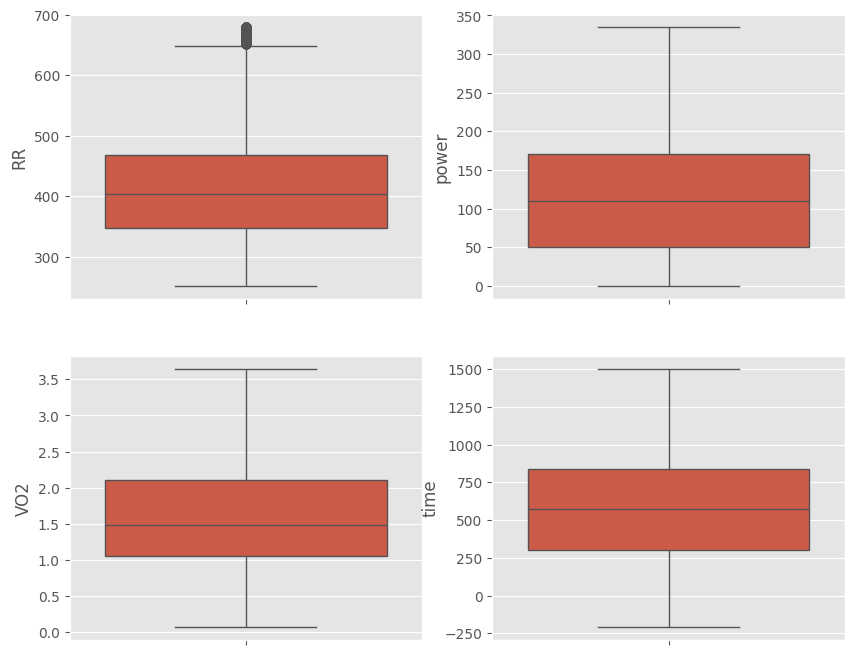

In [26]:
plt.figure(figsize=(10,17))
plt.style.use('ggplot')
plt.subplot(4,2,1)
sns.boxplot(Cleaned_data.RR)
plt.subplot(4,2,2)
sns.boxplot(Cleaned_data.power)
plt.subplot(4,2,3)
sns.boxplot(Cleaned_data['VO2'])
plt.subplot(4,2,4)
sns.boxplot(Cleaned_data.time)

In [32]:
#rearrange the index
Cleaned_data=Cleaned_data.reset_index(drop=True)
Cleaned_data

,ID,time,RR,VO2,power
0,11,-166.484,664.0,0.320580,0
1,11,-165.836,648.0,0.320580,0
2,11,-165.216,620.0,0.320580,0
3,11,-155.916,676.0,0.581595,0
4,11,-149.884,660.0,0.434571,0
...,...,...,...,...,...
48697,10,942.700,428.0,0.786363,0
48698,10,943.124,424.0,0.786363,0
48699,10,943.552,428.0,0.786363,0
48700,10,943.976,424.0,0.786363,0


#Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down


In [33]:
#Divide the tests into three parts: Warm-up, Actual GET test and Cool-down
Cleaned_data.loc[Cleaned_data['time'] <0, 'stage'] = 'Warm up'
Cleaned_data.loc[(Cleaned_data['time'] >=0) & (Cleaned_data['power'] >0), 'stage'] = 'Get'
Cleaned_data.loc[(Cleaned_data['time'] >0) & (Cleaned_data['power'] ==0), 'stage'] = 'Cool down'

Cleaned_data.sample(10)

,ID,time,RR,VO2,power,stage
33572,4,1298.144,400.000000,0.834977,0,Cool down
33835,5,15.328,540.000000,0.738773,50,Get
39361,6,942.348,376.000000,1.576382,0,Cool down
16320,16,340.120,440.000000,1.744788,95,Get
37667,6,273.904,488.000000,1.429544,80,Get
44378,9,269.288,384.000000,1.125616,95,Get
2349,11,985.388,369.093969,2.656808,260,Get
45012,9,493.604,332.000000,1.337624,140,Get
14659,15,648.120,340.000000,1.983104,170,Get
25205,2,50.876,500.000000,0.956498,50,Get


# Calculate Heart rate and Heart rate zones

In [34]:
# Function for create HeartRate
def Heart_Rate(rr):
    return round(60*1000/rr,2)
# Function for create HeartRate_Zones
def Heartrate_Zone(hr):
    if hr<100:
        return 'Zone 1'
    elif hr>=100 and hr<120:
        return 'Zone 2'
    elif hr>=120 and hr<135:
        return 'Zone 3'
    elif hr>=135 and hr<155:
        return 'Zone 4'
    else:
        return 'Zone 5'
# Add HR and HR_Zone in the merged dataset
Cleaned_data['HR']=Cleaned_data['RR'].apply(Heart_Rate)
Cleaned_data['HR_Zone']=Cleaned_data['HR'].apply(Heartrate_Zone)
print(Cleaned_data)

       ID     time     RR       VO2  power      stage      HR HR_Zone
0      11 -166.484  664.0  0.320580      0    Warm up   90.36  Zone 1
1      11 -165.836  648.0  0.320580      0    Warm up   92.59  Zone 1
2      11 -165.216  620.0  0.320580      0    Warm up   96.77  Zone 1
3      11 -155.916  676.0  0.581595      0    Warm up   88.76  Zone 1
4      11 -149.884  660.0  0.434571      0    Warm up   90.91  Zone 1
...    ..      ...    ...       ...    ...        ...     ...     ...
48697  10  942.700  428.0  0.786363      0  Cool down  140.19  Zone 4
48698  10  943.124  424.0  0.786363      0  Cool down  141.51  Zone 4
48699  10  943.552  428.0  0.786363      0  Cool down  140.19  Zone 4
48700  10  943.976  424.0  0.786363      0  Cool down  141.51  Zone 4
48701  10  944.404  428.0  0.786363      0  Cool down  140.19  Zone 4

[48702 rows x 8 columns]


In [35]:
# merege the All_sports dataframe with Athletes table
merged_sports=pd.merge(Cleaned_data,Athletes,on='ID',how='inner')
print(merged_sports)

       ID     time     RR       VO2  power      stage      HR HR_Zone  age  \
0      11 -166.484  664.0  0.320580      0    Warm up   90.36  Zone 1   18   
1      11 -165.836  648.0  0.320580      0    Warm up   92.59  Zone 1   18   
2      11 -165.216  620.0  0.320580      0    Warm up   96.77  Zone 1   18   
3      11 -155.916  676.0  0.581595      0    Warm up   88.76  Zone 1   18   
4      11 -149.884  660.0  0.434571      0    Warm up   90.91  Zone 1   18   
...    ..      ...    ...       ...    ...        ...     ...     ...  ...   
48697  10  942.700  428.0  0.786363      0  Cool down  140.19  Zone 4   14   
48698  10  943.124  424.0  0.786363      0  Cool down  141.51  Zone 4   14   
48699  10  943.552  428.0  0.786363      0  Cool down  140.19  Zone 4   14   
48700  10  943.976  424.0  0.786363      0  Cool down  141.51  Zone 4   14   
48701  10  944.404  428.0  0.786363      0  Cool down  140.19  Zone 4   14   

       Weight  Height  P_vt1  P_vt2    sport  Gender Ethnicity 

#Calculate VO2 Max

In [38]:
# Calculate rolling mean for 'HR' column grouped by 'ID'.
# Window size mentioed as 5 because we are calculating mean value of 5 consecutive HR and VO2 values
window_size = 5
Cleaned_data_test=Cleaned_data.copy()
Cleaned_data_test['HR_mean'] = Cleaned_data_test.groupby('ID')['HR'].rolling(window=window_size, min_periods=1).mean().reset_index(level=0, drop=True)

# Calculate rolling mean for 'VO2' column grouped by 'ID'
Cleaned_data_test['VO2_mean'] = Cleaned_data_test.groupby('ID')['VO2'].rolling(window=window_size, min_periods=1).mean().reset_index(level=0, drop=True)

Cleaned_data_test

,ID,time,RR,VO2,power,stage,HR,HR_Zone,HR_mean,VO2_mean
0,11,-166.484,664.0,0.320580,0,Warm up,90.36,Zone 1,90.360,0.320580
1,11,-165.836,648.0,0.320580,0,Warm up,92.59,Zone 1,91.475,0.320580
2,11,-165.216,620.0,0.320580,0,Warm up,96.77,Zone 1,93.240,0.320580
3,11,-155.916,676.0,0.581595,0,Warm up,88.76,Zone 1,92.120,0.385834
4,11,-149.884,660.0,0.434571,0,Warm up,90.91,Zone 1,91.878,0.395581
...,...,...,...,...,...,...,...,...,...,...
48697,10,942.700,428.0,0.786363,0,Cool down,140.19,Zone 4,140.718,0.786363
48698,10,943.124,424.0,0.786363,0,Cool down,141.51,Zone 4,140.982,0.786363
48699,10,943.552,428.0,0.786363,0,Cool down,140.19,Zone 4,140.718,0.786363
48700,10,943.976,424.0,0.786363,0,Cool down,141.51,Zone 4,140.982,0.786363


In [42]:
# calculating max of HR and VO2 from the Mean HR/VO2 values by ID
Cleaned_data_test1=Cleaned_data_test.groupby('ID')[['HR_mean','VO2_mean','power']].max().reset_index()
Cleaned_data_test1=pd.merge(Cleaned_data_test1,Athletes,on='ID',how='inner')
Cleaned_data_test1['VO2_mean']=Cleaned_data_test1['VO2_mean']/Cleaned_data_test1['Weight']*1000
Cleaned_data_test1.rename(columns={'HR_mean':'HR_Max','VO2_mean':'VO2_Max','power':'power_Max'},inplace=True)
Cleaned_data_test1


,ID,HR_Max,VO2_Max,power_Max,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
0,1,195.322,33.329152,170,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez
1,2,184.956,34.422249,140,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds
2,3,180.302,37.976412,305,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper
3,4,197.648,44.930322,305,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez
4,5,188.008,43.916549,275,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson
5,6,184.934,51.766691,245,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez
6,7,195.782,32.848498,170,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons
7,8,186.210,38.375955,170,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett
8,9,189.870,30.328451,200,14,57.1,176,50,125,fencing,Female,African,Chloe,Price
9,10,190.846,39.919757,200,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan


In [44]:
#calculate HRV from RR column
df_HRV=(Cleaned_data.groupby('ID')['RR'].std()/1000).reset_index(name='HRV')

#Merge this to Athletes dataset
Cleaned_data_test1=pd.merge(Cleaned_data_test1,df_HRV,on='ID',how='inner')
Cleaned_data_test1

,ID,HR_Max,VO2_Max,power_Max,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,HRV
0,1,195.322,33.329152,170,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,0.071126
1,2,184.956,34.422249,140,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds,0.072448
2,3,180.302,37.976412,305,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper,0.075651
3,4,197.648,44.930322,305,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez,0.074337
4,5,188.008,43.916549,275,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson,0.076241
5,6,184.934,51.766691,245,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,0.078932
6,7,195.782,32.848498,170,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,0.072540
7,8,186.210,38.375955,170,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett,0.071339
8,9,189.870,30.328451,200,14,57.1,176,50,125,fencing,Female,African,Chloe,Price,0.074110
9,10,190.846,39.919757,200,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan,0.082360


In [46]:
#calculate BMI
Cleaned_data_test1['BMI']=round(Cleaned_data_test1['Weight']/(Cleaned_data_test1['Height']**2)*10000,2)
Cleaned_data_test1

,ID,HR_Max,VO2_Max,power_Max,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,HRV,BMI
0,1,195.322,33.329152,170,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,0.071126,20.72
1,2,184.956,34.422249,140,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds,0.072448,21.41
2,3,180.302,37.976412,305,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper,0.075651,24.64
3,4,197.648,44.930322,305,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez,0.074337,23.61
4,5,188.008,43.916549,275,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson,0.076241,22.08
5,6,184.934,51.766691,245,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,0.078932,22.97
6,7,195.782,32.848498,170,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,0.072540,18.29
7,8,186.210,38.375955,170,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett,0.071339,18.81
8,9,189.870,30.328451,200,14,57.1,176,50,125,fencing,Female,African,Chloe,Price,0.074110,18.43
9,10,190.846,39.919757,200,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan,0.082360,18.77


In [49]:
#copy the clean Athlete data into excel file
Cleaned_data_test1.to_excel('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/Athlete_clean_data.xlsx')


In [47]:
Cleaned_data
Cleaned_data.to_excel('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/All_sports_clean_data.xlsx')